In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import things plan on using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
bus = pd.read_csv('drive/MyDrive/data science/Hackathon/ttc-bus-delay-data-2022.csv')
print(bus.head())

       Date Route   Time       Day                Location  \
0  1-Jan-22   320  02:00  Saturday        YONGE AND DUNDAS   
1  1-Jan-22   325  02:00  Saturday  OVERLEA AND THORCLIFFE   
2  1-Jan-22   320  02:00  Saturday       YONGE AND STEELES   
3  1-Jan-22   320  02:07  Saturday       YONGE AND STEELES   
4  1-Jan-22   320  02:13  Saturday       YONGE AND STEELES   

                Incident  Min Delay  Min Gap Direction  Vehicle  
0          General Delay          0        0       NaN     8531  
1              Diversion        131      161         W     8658  
2  Operations - Operator         17       20         S        0  
3  Operations - Operator          4       11         S        0  
4  Operations - Operator          4        8         S        0  


In [128]:
#find incidents with most delays
incidents = bus.groupby('Incident')['Min Delay'].mean().reset_index()
incidents = incidents.sort_values(by=['Min Delay'], ascending=False)
#print(incidents)
#days gap
gapincidents = bus.groupby('Incident')['Min Gap'].mean().reset_index()
gapincidents = gapincidents.sort_values(by=['Min Gap'], ascending=False)
print(gapincidents)

                            Incident     Min Gap
3                          Diversion  139.147736
6                            Held By  118.774194
0            Cleaning - Disinfection  116.600000
11  Road Blocked - NON-TTC Collision   88.535826
5                      General Delay   45.172498
8              Late Entering Service   30.000000
1              Cleaning - Unsanitary   29.761566
14                            Vision   27.592834
10             Operations - Operator   26.342474
9                         Mechanical   25.986715
12                          Security   25.839925
13                Utilized Off Route   23.877778
7                      Investigation   23.342298
2                    Collision - TTC   22.987383
4                 Emergency Services   22.570018


<ipython-input-175-7eedfcbf3da2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


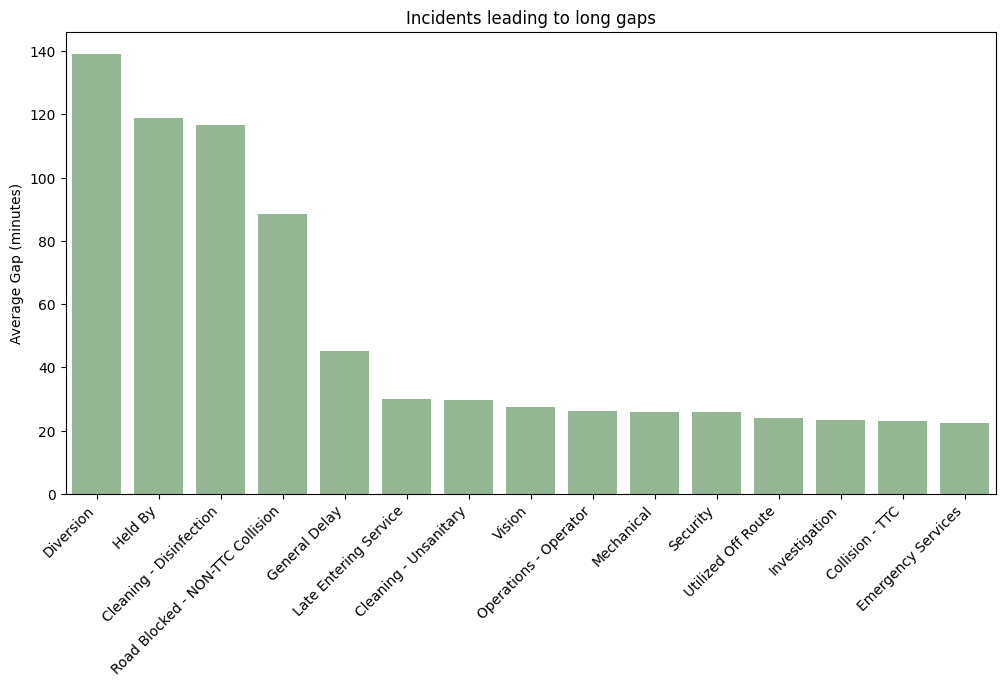

In [175]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=gapincidents,x="Incident", y= 'Min Gap',color= 'darkseagreen',errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Incidents leading to long gaps')
plt.xlabel("")
plt.ylabel("Average Gap (minutes)")
#plt.show()
plt.savefig("Incidents leading to long gaps.jpeg", bbox_inches='tight', pad_inches=0.1)

         Day    Min Gap
5    Tuesday  30.007326
0     Friday  31.271561
4   Thursday  31.633861
1     Monday  33.124225
6  Wednesday  33.297872
3     Sunday  36.478629
2   Saturday  36.501575


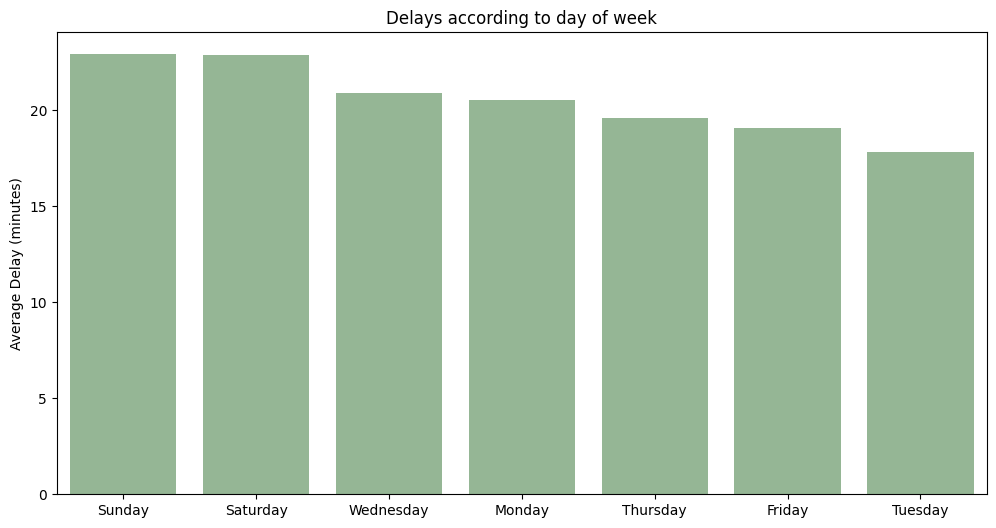

In [177]:
#find day with most delays
days = bus.groupby('Day')['Min Delay'].mean().reset_index()
days = days.sort_values(by=['Min Delay'], ascending=False)
#days gap
gapdays = bus.groupby('Day')['Min Gap'].mean().reset_index()
gapdays = gapdays.sort_values(by=['Min Gap'], ascending=False)
#print(gapdays)
descgapdays = gapdays.sort_values(by=['Min Gap'])
print(descgapdays)
#plot
plt.figure(figsize=(12, 6))
sns.barplot(data=days,x="Day", y= 'Min Delay',color= 'darkseagreen',errorbar=None)
plt.title('Delays according to day of week')
plt.xlabel("")
plt.ylabel("Average Delay (minutes)")
plt.savefig("Delays according to day of week.jpeg",bbox_inches='tight', pad_inches=0.1)


In [131]:
#find avg delay grouped by route
route = bus.groupby('Route')['Min Delay'].mean().reset_index()
route = route.sort_values(by=['Min Delay'], ascending=False)
print(route)

               Route   Min Delay
1                 10  142.250000
131               55  131.629630
166               82  102.161290
32                13   92.971429
39                14   89.191489
..               ...         ...
138  600 RAD (LINE 1    0.000000
125              510    0.000000
70               301    0.000000
220             A242    0.000000
111              441    0.000000

[223 rows x 2 columns]


      Vehicle     Min Gap
5         119  260.000000
1015     7929  213.000000
1392     8418  205.166667
387      3115  194.000000
1926     8972  182.000000
1791     8830  164.600000
636      3364  137.666667
1786     8825  126.416667
1700     8739  120.000000
1103     8046  118.000000
1509     8540  111.923077
1561     8595  108.875000
1482     8513  107.923077
1525     8557  107.428571
1407     8433  106.642857
1609     8645  106.500000
221      1280  103.600000
2055     9129  102.166667
1105     8048   99.083333
1519     8550   97.857143


<ipython-input-179-a90ae10cd7a7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


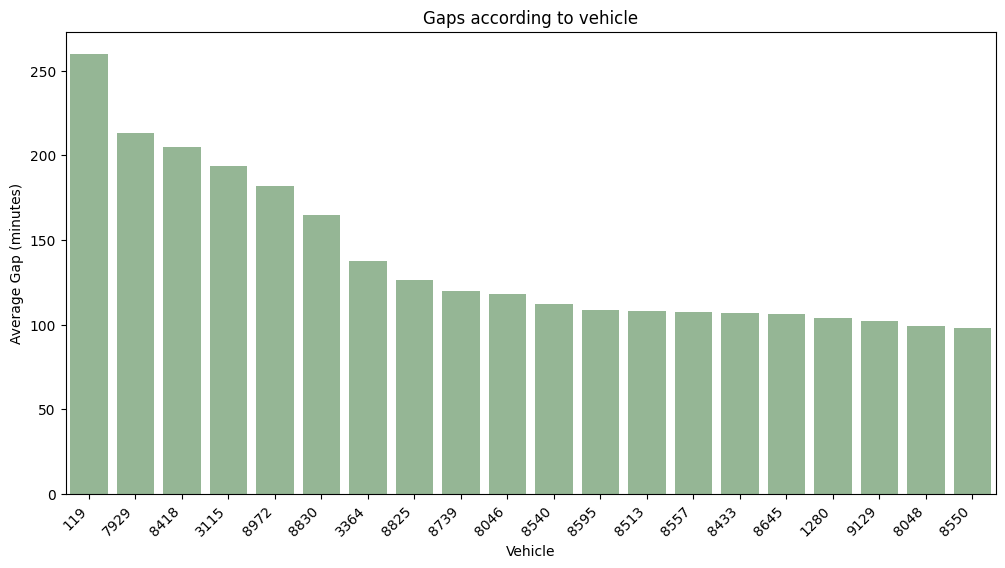

In [179]:
#find avg delay grouped by route
vehicle = bus.groupby('Vehicle')['Min Gap'].mean().reset_index()
vehicle = vehicle.sort_values(by=['Min Gap'], ascending=False)
top_20_delayed = vehicle[:20]
print(top_20_delayed)
#plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_20_delayed,x="Vehicle", y= 'Min Gap',color= 'darkseagreen',errorbar=None,order=top_20_delayed['Vehicle'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Gaps according to vehicle')
plt.xlabel("Vehicle")
plt.ylabel("Average Gap (minutes)")
plt.savefig("Gaps according to vehicle.jpeg", bbox_inches='tight', pad_inches=0.1)

In [163]:
bus['Time'] = pd.to_datetime(bus['Time'])

# Group by every 30 minutes interval and calculate the mean delay for each interval
timing = bus.groupby(pd.Grouper(key='Time', freq='15T'))['Min Delay'].mean().reset_index()

# Print the resulting DataFrame
print(timing)

                  Time  Min Delay
0  2024-02-25 00:00:00  20.122807
1  2024-02-25 00:15:00  20.664234
2  2024-02-25 00:30:00  22.037313
3  2024-02-25 00:45:00  22.720339
4  2024-02-25 01:00:00  22.845455
..                 ...        ...
91 2024-02-25 22:45:00  26.806283
92 2024-02-25 23:00:00  29.257862
93 2024-02-25 23:15:00  25.352113
94 2024-02-25 23:30:00  23.299401
95 2024-02-25 23:45:00  17.607362

[96 rows x 2 columns]


In [190]:
bus['Time_hour'] = bus['Time'].dt.ceil('15T').dt.time
print(bus['Time_hour'])

0        02:00:00
1        02:00:00
2        02:00:00
3        02:15:00
4        02:15:00
           ...   
27346    00:45:00
27347    01:15:00
27348    01:15:00
27349    01:45:00
27350    02:00:00
Name: Time_hour, Length: 27351, dtype: object


In [191]:
#sort gap by timing grouped by 15 min intervals
timing = bus.groupby('Time_hour')['Min Gap'].mean().reset_index()
timing = timing.sort_values(by=['Min Gap'], ascending=False)
print(timing.head(20))


   Time_hour    Min Gap
33  08:15:00  55.430070
79  19:45:00  47.244094
46  11:30:00  47.003650
13  03:15:00  46.413333
91  22:45:00  46.064516
16  04:00:00  44.904110
93  23:15:00  43.213333
41  10:15:00  43.074906
94  23:30:00  41.855263
92  23:00:00  41.839378
4   01:00:00  41.663793
15  03:45:00  40.900000
12  03:00:00  39.945055
31  07:45:00  39.910853
14  03:30:00  39.550000
84  21:00:00  39.520325
10  02:30:00  39.468750
11  02:45:00  39.373737
83  20:45:00  39.285714
6   01:30:00  39.081301


   Time_hour    Min Gap
33  08:15:00  55.430070
79  19:45:00  47.244094
46  11:30:00  47.003650
13  03:15:00  46.413333
91  22:45:00  46.064516
16  04:00:00  44.904110
93  23:15:00  43.213333
41  10:15:00  43.074906
94  23:30:00  41.855263
92  23:00:00  41.839378


<ipython-input-192-10eeca7c2831>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


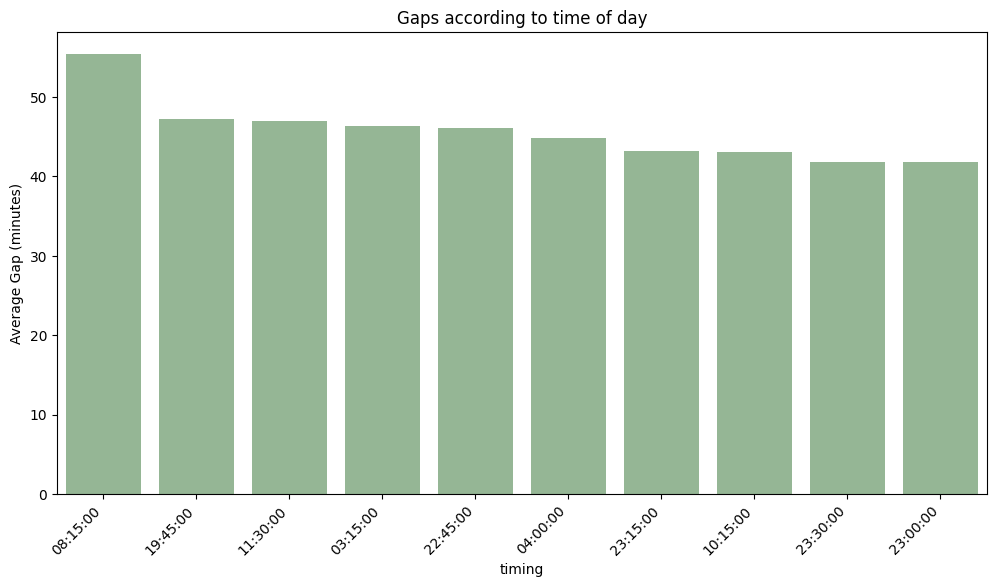

In [192]:
top_20_time_gap = timing[:10]
print(top_20_time_gap)
#plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_20_time_gap,x="Time_hour", y= 'Min Gap',color= 'darkseagreen',errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Gaps according to time of day')
plt.xlabel("timing")
plt.ylabel("Average Gap (minutes)")
plt.savefig("Gaps according to time of day.jpeg", bbox_inches='tight', pad_inches=0.1)